In [1]:
from generate_time_series import (load_belousov_zhabotinsky_time_series,
                                  load_double_pendulum_time_series,
                                  load_harmonic_oscillator_time_series,
                                  load_lorenz_attractor_time_series,
                                  load_two_body_problem_time_series)
from ordinal_patterns_irreversibility import (time_asymmetry_metric,
                                              permutation_distribution,
                                              freq_dicts_to_prob_arrays)

In [2]:
import matplotlib.pyplot as plt

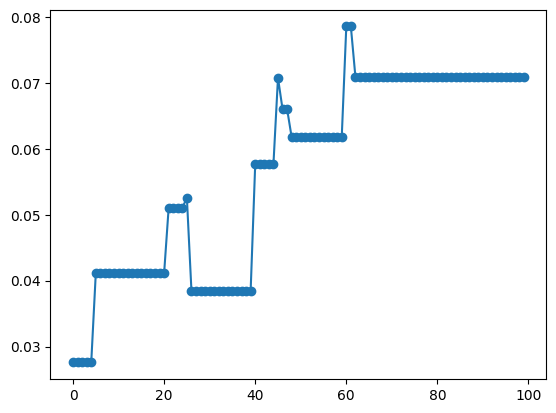

In [4]:
js = [time_asymmetry_metric(h[:900], embed_dim=5) for h in hos]
plt.plot(js, "o-")

<BarContainer object of 120 artists>

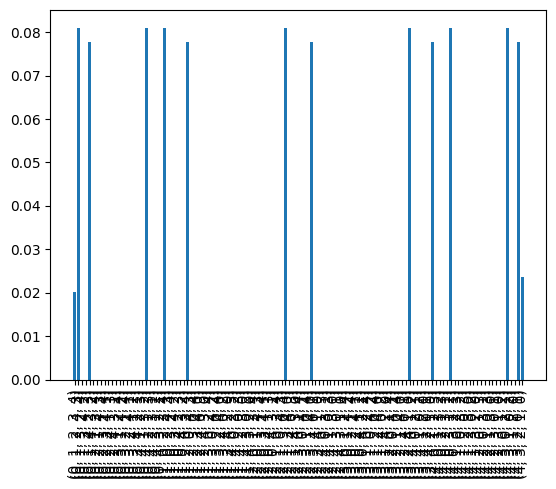

In [5]:
# plt.bar?
freqs = permutation_distribution(hos[1][::5], embed_dim=5)
plt.xticks(rotation='vertical')
plt.bar(list(map(str, freqs.keys())), freqs.values())

In [6]:
time_asymmetry_metric(hos[1][::5], embed_dim=5)

0.017600585674754032

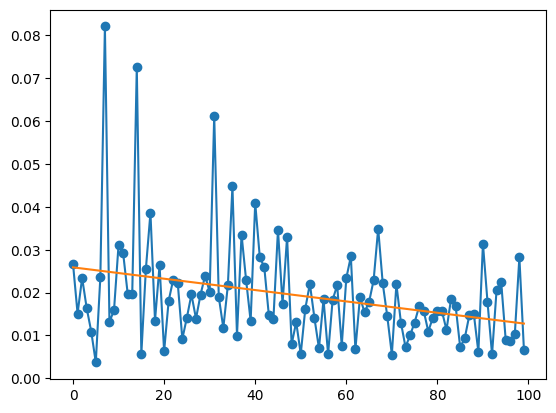

In [7]:
dbp = [load_double_pendulum_time_series(friction=f)[::3, 0] for f in np.linspace(0.003, 0.1, 100)]
js = [time_asymmetry_metric(h, embed_dim=3) for h in dbp]
x = [i for i in range(len(js))]
plt.plot(x, js, "o-")
z = np.polyfit(x, js, 1)
plt.plot(x, np.poly1d(z)(x))

99


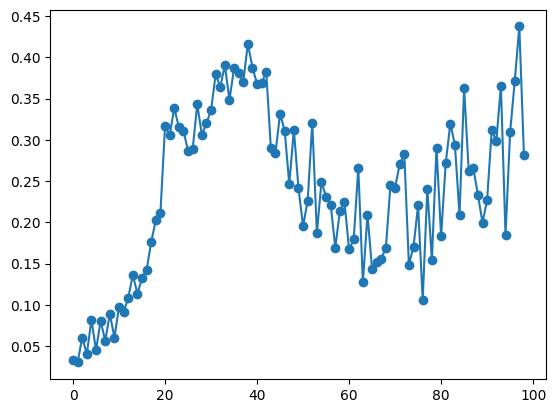

In [8]:
lrz = [load_lorenz_attractor_time_series()[::i, 1] for i in range(1, 100)]
print(len(lrz))
#plt.plot(lrz[8], "o-")
js = [time_asymmetry_metric(h, embed_dim=4) for h in lrz]
plt.plot(js, "o-")

In [9]:
time_series = {
    "Kepler X": load_two_body_problem_time_series()[:, 0],
    "Kepler Y": load_two_body_problem_time_series()[:, 1],
    "Lorenz X": load_lorenz_attractor_time_series()[:, 0],
    "Lorenz Y": load_lorenz_attractor_time_series()[:, 1],
    "Lorenz Z": load_lorenz_attractor_time_series()[:, 2],
    "Belousov-Zhabotinsky X": load_belousov_zhabotinsky_time_series()[:, 0],
    "Belousov-Zhabotinsky Y": load_belousov_zhabotinsky_time_series()[:, 1],
    "Belousov-Zhabotinsky Z": load_belousov_zhabotinsky_time_series()[:, 2],
    "Double pendulum Theta1": load_double_pendulum_time_series()[:, 0],
    "Double pendulum Theta2": load_double_pendulum_time_series()[:, 1],
}

js = { title: [time_asymmetry_metric(ts[::20], embed_dim=d) for d in (3,4,5)]
    for title, ts in time_series.items()
}
js

# ChatGPT: Convert the following python dictionary into a table. The values of this dictionary are lists of length 4. Make sure to add one column per each element of the list.
# 

{'Kepler X': [0.28050132891208307, 0.2948668129115386, 0.30873697544352385],
 'Kepler Y': [0.11822130659986653, 0.14950161993281263, 0.17565205044087592],
 'Lorenz X': [0.03369388304775081, 0.1688565826983812, 0.2966202725651922],
 'Lorenz Y': [0.07605416285589389, 0.21142989379667956, 0.42176792160261817],
 'Lorenz Z': [0.22594352451923783, 0.42019426547163014, 0.5737576174701103],
 'Belousov-Zhabotinsky X': [0.2732833943734555,
  0.28633388895583073,
  0.2989543344842208],
 'Belousov-Zhabotinsky Y': [0.25770699448980433,
  0.27140552294758713,
  0.2845898891202392],
 'Belousov-Zhabotinsky Z': [0.3291627922832302,
  0.34052527385200493,
  0.35165018832629746],
 'Double pendulum Theta1': [0.05594535906999674,
  0.10198593887175651,
  0.23859346400330286],
 'Double pendulum Theta2': [0.020411391187655812,
  0.05703975064253696,
  0.28648054408950335]}

Text(0.5, 1.0, 'Damped harmonic oscillator')

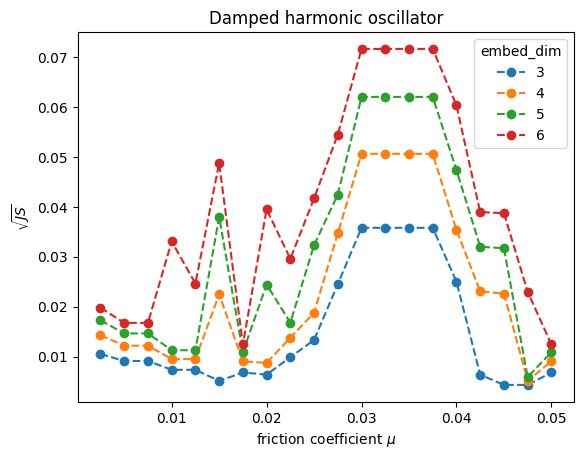

In [34]:
frictions = np.linspace(0.0025, 0.05, 20)
hos = [load_harmonic_oscillator_time_series(friction=f, t_duration=300)[:, 0] for f in frictions]
for D in [3, 4, 5, 6]:
    plt.plot(frictions, [time_asymmetry_metric(h, embed_dim=D) for h in hos], "o--", label=str(D))
plt.legend(title="embed_dim")
plt.xlabel("friction coefficient $\\mu$")
plt.ylabel("$\\sqrt{JS}$")
plt.title("Damped harmonic oscillator")

Text(0.5, 1.0, 'Double pendulum with friction, $\\theta_1$')

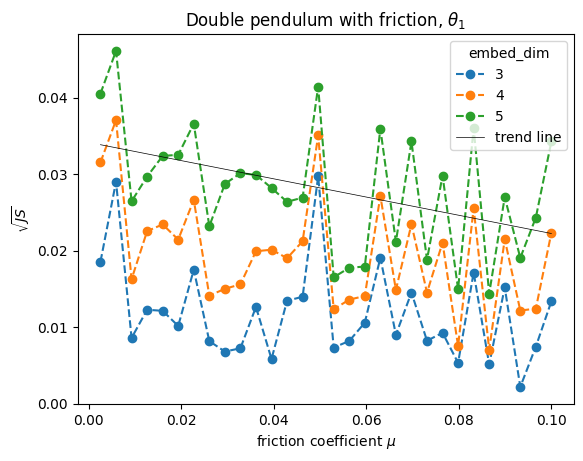

In [3]:
frictions = np.linspace(0.0025, 0.1, 30)
hos = [load_double_pendulum_time_series(friction=f)[:, 0] for f in frictions]
for D in [3,4,5]:
    x = frictions
    y = [time_asymmetry_metric(h, embed_dim=D) for h in hos]
    plt.plot(x, y, "o--", label=str(D))
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"-", color="black", lw=0.5, label="trend line")
plt.legend(title="embed_dim")
plt.xlabel("friction coefficient $\\mu$")
plt.ylabel("$\\sqrt{JS}$")
plt.title("Double pendulum with friction, $\\theta_1$")

Text(0.5, 1.0, 'Double pendulum with friction, $\\theta_2$')

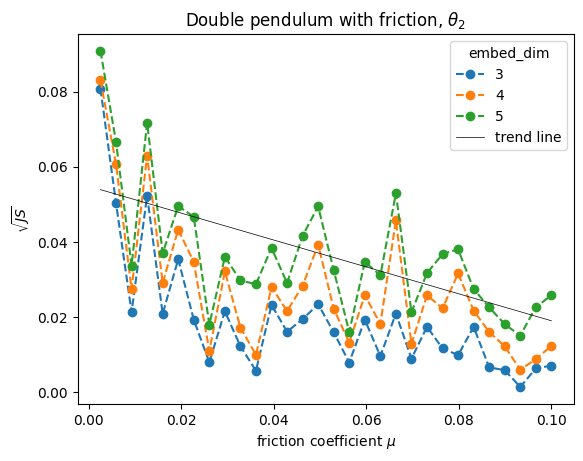

In [4]:
frictions = np.linspace(0.0025, 0.1, 30)
hos = [load_double_pendulum_time_series(friction=f)[:, 1] for f in frictions]
for D in [3,4,5]:
    x = frictions
    y = [time_asymmetry_metric(h, embed_dim=D) for h in hos]
    plt.plot(x, y, "o--", label=str(D))
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"-", color="black", lw=0.5, label="trend line")
plt.legend(title="embed_dim")
plt.xlabel("friction coefficient $\\mu$")
plt.ylabel("$\\sqrt{JS}$")
plt.title("Double pendulum with friction, $\\theta_2$")